# ライブラリの読み込み、初期設定

In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image

import os, sys, re, datetime, time
from copy import deepcopy
from pathlib import Path
from tqdm import tqdm_notebook
from wordcloud import WordCloud

pj_dir = Path(os.getcwd())
data_dir = pj_dir/'data'

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("bmh")
import numpy as np
import pandas as pd
from requests_html import HTMLSession

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 4)
plt.rcParams["font.family"] = "IPAexGothic"
import logging
logging.basicConfig(level=logging.INFO)

# サイトから情報を取得

### endpointの設定

In [ ]:
endpoint = 'https://rebuild.fm/{}/'

### request_htmlを使ってサイトにアクセス

In [ ]:
session = HTMLSession()
episodes = []
for number in tqdm_notebook(range(1, 223)):
    for plus in ['', 'a']: # Normal / Aftershow
        url = endpoint.format(str(number)+plus)
        r = session.get(url)
        if r.status_code != 200: # Aftershowがないとき404が返ってくる
            continue

        # 情報をCSS Selectorで取得
        date_ = r.html.find('#contents > div > span', first=True).text
        date_ = date_.replace('\n', '-')

        record_time = r.html.find('#contents > div > div.post > p > i', first=True).text
        record_time = record_time.replace('収録時間: ', '').replace(' |', '')

        title = r.html.find('#contents > div > h2 > a', first=True).text

        description = r.html.find('#contents > div > div.post > div.episode-description > p', first=True).text

        persons = []
        persion_elements = r.html.find('#contents > div > div.post > div.episode-description > div.episode-people > ul > li')
        for person_element in persion_elements:
            persons.append(person_element.text)

        shownotes = []
        shownote_elements = r.html.find('#show_notes_ > ul > li > a')
        for shownote_element in shownote_elements:
            shownotes.append(shownote_element.text)

        # 情報を辞書にしてappend
        episode = {
            'date': date_,
            'record_time': record_time, 
            'title': title, 
            'persons': persons,
            'shownotes': shownotes
        }
        episodes.append(episode)
        
        # サイトに負荷をかけないように1秒間ごとに
        time.sleep(1)

### pd.DataFrame形式に変換して保存

In [ ]:
df = pd.DataFrame(episodes)

In [19]:
df.head(20)

,date,persons,record_time,shownotes,title
0,Feb 13-2013,"['naoya', 'miyagawa']",52:53,"['5by5,', 'Mule Radio', 'Instapaper for Androi...","1: Podcasting, LTSV, RubyMotion (伊藤直也)"
1,Feb 20-2013,"['kenn', 'miyagawa']",47:56,"['Macbook Pro, Air update', 'Crashplan', 'Arq'...","2: Rails, Redis, VPS (Kenn Ejima)"
2,Feb 27-2013,"['frsyuki', 'kiyoto', 'miyagawa']",40:39,[],"3: MessagePack (frsyuki, kiyoto)"
3,Mar 06-2013,"['satoru', 'miyagawa']",31:04,[],"4: bkノート, Yak Shaving, Code Reviews (高林哲)"
4,Mar 13-2013,"['matz', 'miyagawa']",35:12,"['Ruby 20周年', 'Ruby 2.0.0-p0 released', 'COOKP...",5: Ruby 2.0 (まつもとゆきひろ)
5,Mar 21-2013,"['naoya', 'miyagawa']",41:20,[],"6: Kindle Publishing, Google Reader Shutdown (..."
6,Apr 03-2013,"['yusukebe', 'miyagawa']",40:06,"['Shibuya.pm', 'Perl Casual', 'Blog Hacks', 'P...","7: Perl Community, YAPC (yusukebe)"
7,Apr 16-2013,"['naoya', 'satoru', 'miyagawa']",26:50,"['Railscasts', 'Milla screencast', 'ドットインストール'...","8: Screencasts, Pair Programming, English (伊藤直..."
8,May 08-2013,"['obra', 'miyagawa']",34:45,"['OSDC.TW', 'cpanm 1.6/1.7 at OSDC.TW', 'So I ...",9: Making your own keyboard (Jesse Vincent)
9,May 11-2013,"['mrkn', 'r7kamura', 'miyagawa']",47:42,[],"10: RailsConf, Ruby 2.0, Rails 4 (mrkn, r7kamura)"


In [20]:
df.to_csv(data_dir/'rebuildfm.csv', index=False)
df.to_pickle(data_dir/'rebuildfm.pickle')

# 前処理

In [25]:
# datetime型に変換
df['date'] = pd.to_datetime(df['date'])

# shownotesの数を保存
n_shownotes = []
for i, row in df.iterrows():
    n_s = len(row['shownotes'])
    n_shownotes.append(n_s)
df['n_shownotes'] = n_shownotes

# 収録時間(ex: 52:53)を正規表現を使って分(integer)に変換
hours = df['record_time'].str.extract('(?<=^)(\d)(?=:\d\d:\d\d$)').fillna(0).astype(int)
minutes = df['record_time'].str.extract('(\d\d)(?=:)') .fillna(0).astype(int)
seconds = df['record_time'].str.extract('(?<=\d\d)(\d\d)(?=$)') .fillna(0).astype(int)
df['minutes'] = hours*60 + minutes + seconds/60

# Aftershowかどうか
df['is_aftershow'] = False
df['is_aftershow'] = df['is_aftershow'].mask(df['title'].str.contains('Aftershow', na=False), True)

In [26]:
df['is_aftershow'].value_counts()

False    221
True     123
Name: is_aftershow, dtype: int64

### 本編とAftershowを合算する

In [34]:
# episodeのナンバー
df['show_no'] = df['title'].str.extract('^(\d\d?\d?)')
df['show_no'] = df['show_no'].mask(df['show_no'].isnull(), df['title'].str.extract('^Aftershow (\d\d?\d?)')[0])

In [35]:
dfm = pd.merge(df.query('~is_aftershow'), df.query('is_aftershow'), how='left', on='show_no', suffixes=('_main', '_after'))
dfm['date'] = dfm['date_main']
dfm['minutes'] = dfm['minutes_main'].fillna(0) + dfm['minutes_after'].fillna(0)
dfm['persons'] = dfm['persons_main']
dfm['n_shownotes'] = dfm['n_shownotes_main'].fillna(0) + dfm['n_shownotes_after'].fillna(0) 

# 可視化

### histグラム用の関数を定義

In [27]:
def plot_hist(s, title, bins=30):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 1, 1)

    mean =s.mean().round(2)
    median = s.median().round(2)
    std = s.std().round(2)

    sns.distplot(s, ax=ax, bins=bins, kde_kws={"color": "k", "lw": 3})
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 20)
    vals = ax.get_yticks()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    ax.text( 0.99, 0.99, f"平均値: {mean:.2f} \n 中央値: {median:.2f} \n 標準偏差: {std:.2f}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=20)

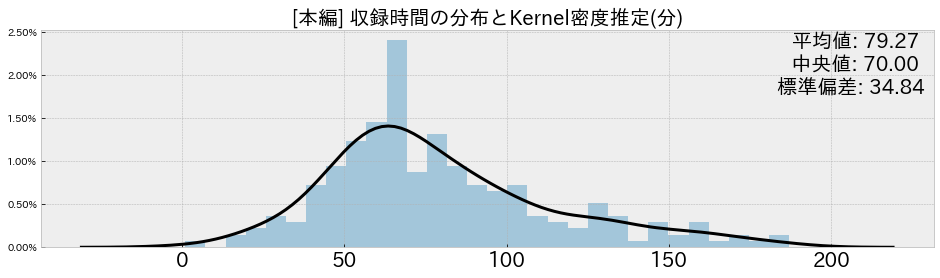

In [31]:
plot_hist(df.query('~is_aftershow')['minutes'], '[本編] 収録時間の分布とKernel密度推定(分)')

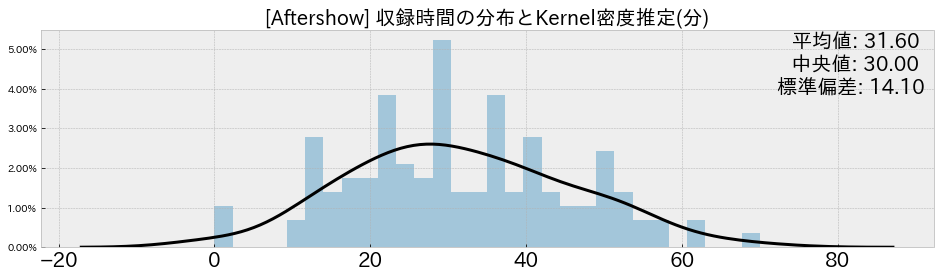

In [32]:
plot_hist(df.query('is_aftershow')['minutes'], '[Aftershow] 収録時間の分布とKernel密度推定(分)')

Text(0,0.5,'')

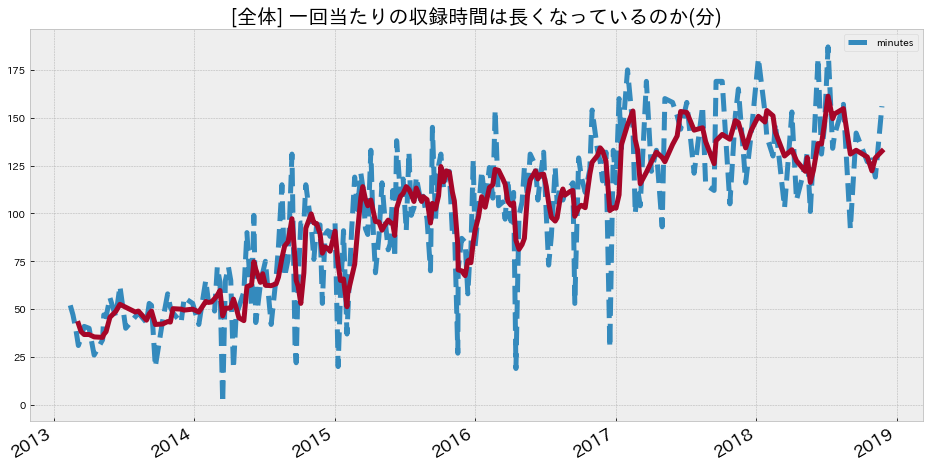

In [36]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
dfm.plot('date', 'minutes', linewidth=5, linestyle='--', ax=ax)
dfm.set_index('date')['minutes'].rolling(window=4).mean().plot(linewidth=5, ax=ax)
ax.set_title('[全体] 一回当たりの収録時間は長くなっているのか(分)', fontsize=20)
ax.tick_params(axis='x', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

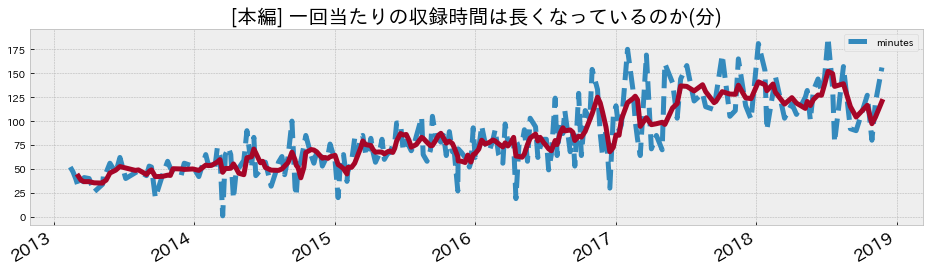

In [37]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
df.query('~is_aftershow').plot('date', 'minutes', linewidth=5, linestyle='--', ax=ax)
df.query('~is_aftershow').set_index('date')['minutes'].rolling(window=4).mean().plot(linewidth=5, ax=ax)
ax.set_title('[本編] 一回当たりの収録時間は長くなっているのか(分)', fontsize=20)
ax.tick_params(axis='x', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

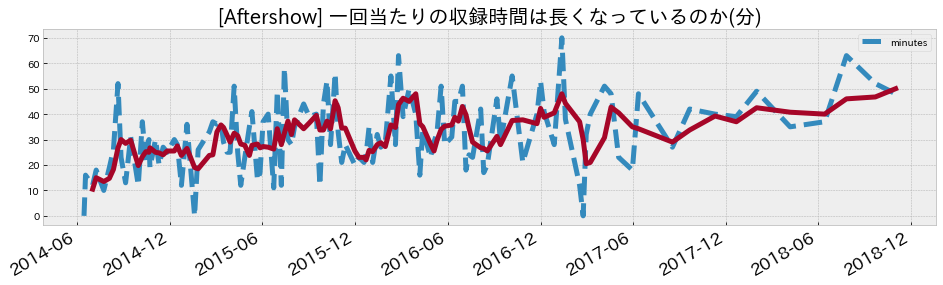

In [38]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
df.query('is_aftershow').plot('date', 'minutes', linewidth=5, linestyle='--', ax=ax)
df.query('is_aftershow').set_index('date')['minutes'].rolling(window=4).mean().plot(linewidth=5, ax=ax)
ax.set_title('[Aftershow] 一回当たりの収録時間は長くなっているのか(分)', fontsize=20)
ax.tick_params(axis='x', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

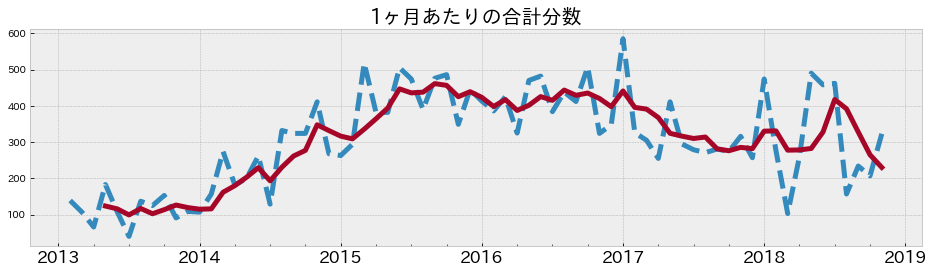

In [39]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = df.groupby(pd.Grouper(key='date', freq='1M'))['minutes'].sum().plot(linewidth=5, linestyle='--', ax=ax)
ax = df.groupby(pd.Grouper(key='date', freq='1M'))['minutes'].sum().rolling(window=4).mean().plot(linewidth=5, ax=ax)
ax.set_title('1ヶ月あたりの合計分数', fontsize=20)
ax.tick_params(axis='x', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

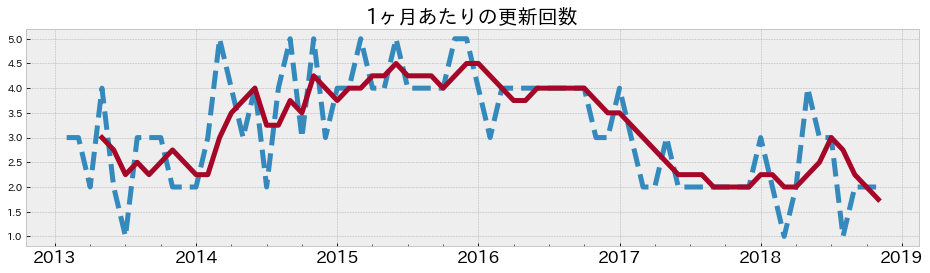

In [40]:
fig = plt.figure(figsize=(16, 4))
ax = dfm.groupby(pd.Grouper(key='date', freq='1M')).size().plot(linewidth=5, linestyle='--')
ax = dfm.groupby(pd.Grouper(key='date', freq='1M')).size().rolling(window=4).mean().plot(linewidth=5, ax=ax)
ax.set_title('1ヶ月あたりの更新回数', fontsize=20)
ax.tick_params(axis='x', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

# 出演者について

### 出演者情報をまとめる

In [41]:
persons = []
for i, row in df.query('~is_aftershow').iterrows():
    tmp_persosn = row['persons']
    persons.extend(tmp_persosn)
s_persons = pd.Series(persons)
s_persons = s_persons[s_persons != 'miyagawa'] # miyagawaさんは除外

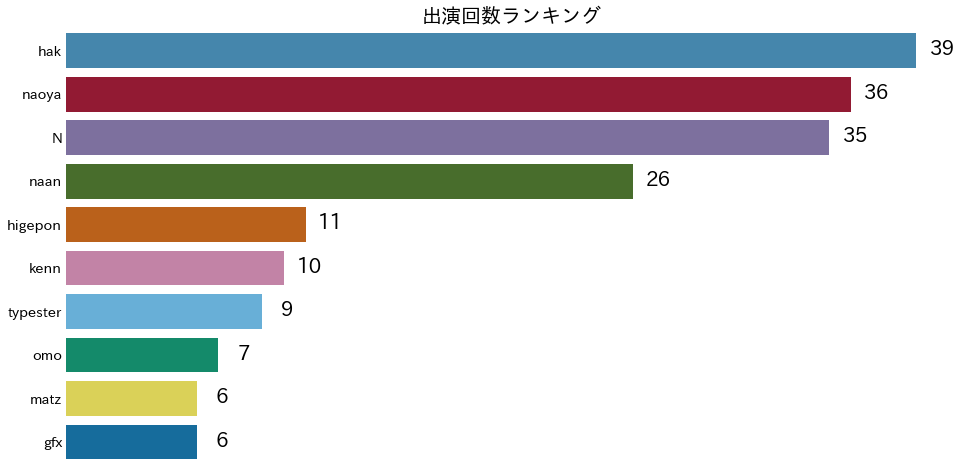

In [42]:
fig = plt.figure(figsize=(16,8))

tmp_df = s_persons.value_counts()[:10].to_frame('value').reset_index().rename(columns={'index': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.03, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('出演回数ランキング', fontsize=20)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

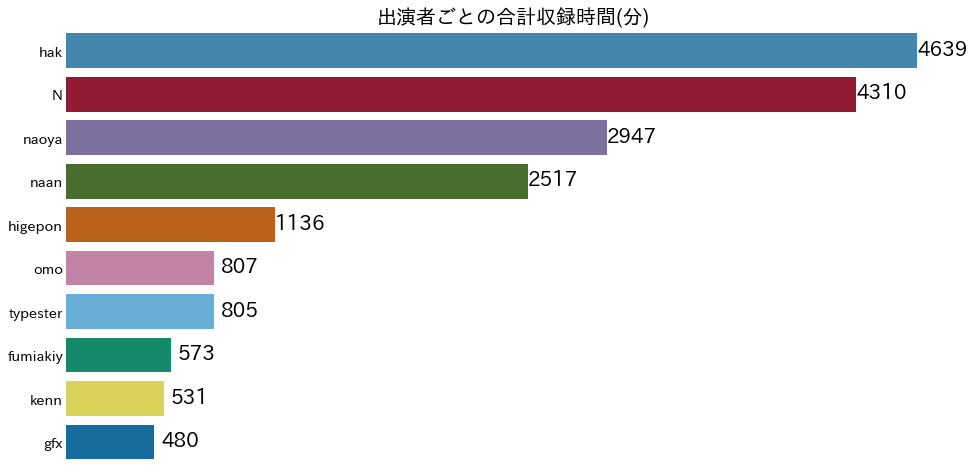

In [58]:
plt.figure(figsize=(16,8))

tmp_df = dfs.groupby('person')['minutes'].sum().sort_values(ascending=False)[1:11].to_frame('value').reset_index().rename(columns={'person': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.03, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('出演者ごとの合計収録時間(分)', fontsize=20)

ax.patch.set_alpha(0)
plt.grid(False)

# shownoteについて

### shownote情報をまとめる

In [43]:
shownotes = []
for i, row in df.iterrows():
    tmp_shownote = row['shownotes']
    shownotes.extend(tmp_shownote)
s_shownotes = pd.Series(shownotes)

# 一般的な単語や記号を除外
ignore_word = [':', '/', '-', '–', 'to', 'your', 'for', 'the', 'and', '|', 'in', 'of', 'a', 'is', 'on', 'with', 'how', 'new', 'by', '2', 'at', 'rebuild:']

shownotes_split = []
for i, row in df.iterrows():
    tmp_shownote = row['shownotes']
    for t in tmp_shownote:
        tmp_split = t.split()
        shownotes_split.extend(tmp_split)
shownotes_split = [s.lower().replace(',', '') for s in shownotes_split]
shownotes_split = [s for s in shownotes_split if s not in ignore_word]

s_shownotes_split = pd.Series(shownotes_split)

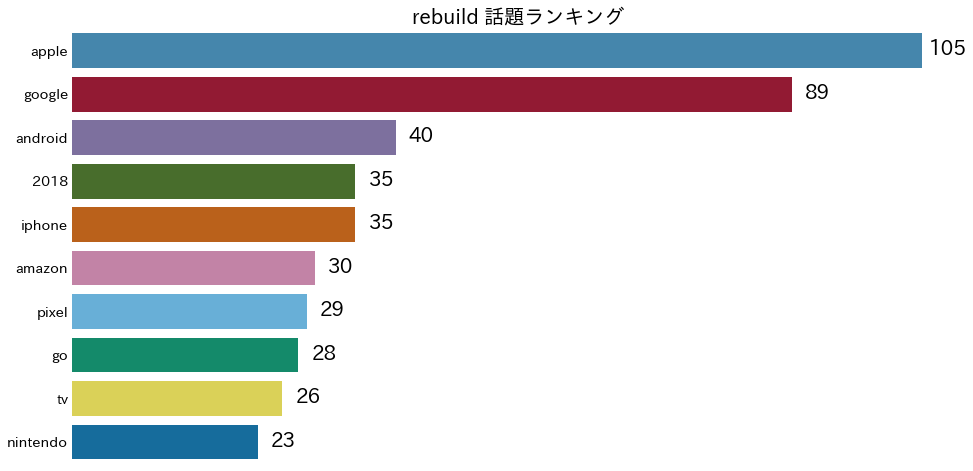

In [44]:
plt.figure(figsize=(16,8))

tmp_df = s_shownotes_split.value_counts()[:10].to_frame('value').reset_index().rename(columns={'index': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.03, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('rebuild 話題ランキング', fontsize=20)

ax.patch.set_alpha(0)
ax.patch.set_facecolor('white') 
plt.grid(False)

### ワードバスケットを表示

[None, None, None, None]

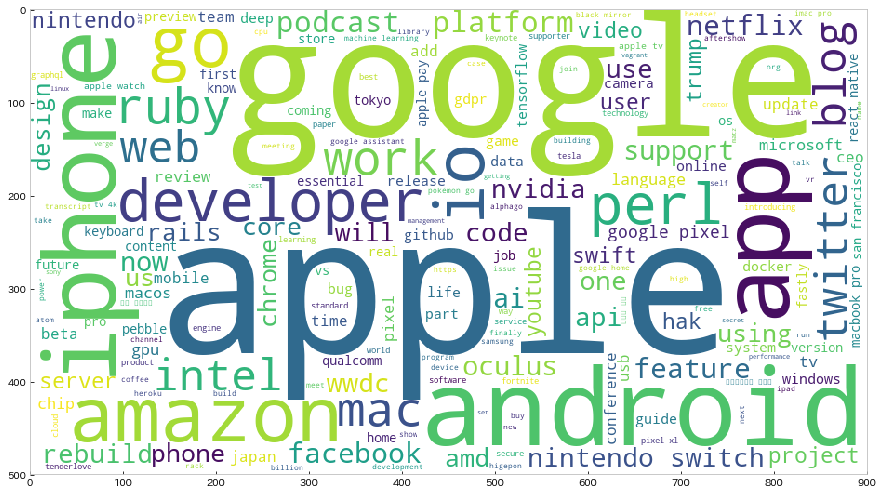

In [62]:
plt.figure(figsize=(15,12))
wordcloud = WordCloud(background_color="white", width=900, height=500).generate(" ".join(shownotes_split))
plt.imshow(wordcloud)
plt.grid(False)
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.set_xlabel('')
ax.set_ylabel('')
[spine.set_visible(False) for spine in ax.spines.values()]

# 出演者ごとの収録時間/shownoteについて

### 1行に出演者が複数人いるので1行1出演者に正規化する

In [46]:
# 本編/Aftershowどちらも含んだデータ
ls_dfs = []
for i, row in df.iterrows():
    persons = row['persons']
    for p in persons:
        new_row = deepcopy(row)
        new_row['person'] = p
        ls_dfs.append(new_row)
dfs = pd.DataFrame(ls_dfs)

In [47]:
# 本編/Aftershowが合算されたデータ
ls_dfms = []
for i, row in dfm.iterrows():
    persons = row['persons']
    for p in persons:
        new_row = deepcopy(row)
        new_row['person'] = p
        ls_dfms.append(new_row)
dfms = pd.DataFrame(ls_dfms)

### 全員分表示すると多いのでTOP10に絞る

In [48]:
top10_speaker = s_persons.value_counts()[:10].index.tolist()

Text(0,0.5,'')

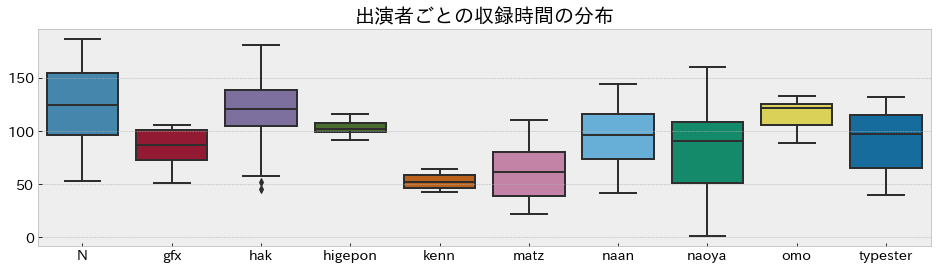

In [52]:
ax = sns.boxplot(data=dfms.query('person in @top10_speaker').sort_values('person'), x='person', y='minutes')
ax.set_title('出演者ごとの収録時間の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

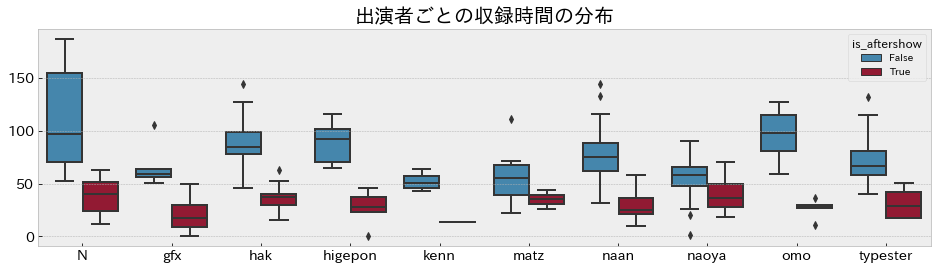

In [65]:
ax = sns.boxplot(data=dfs.query('person in @top10_speaker').sort_values('person'), x='person', y='minutes', hue='is_aftershow')
ax.set_title('出演者ごとの収録時間の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

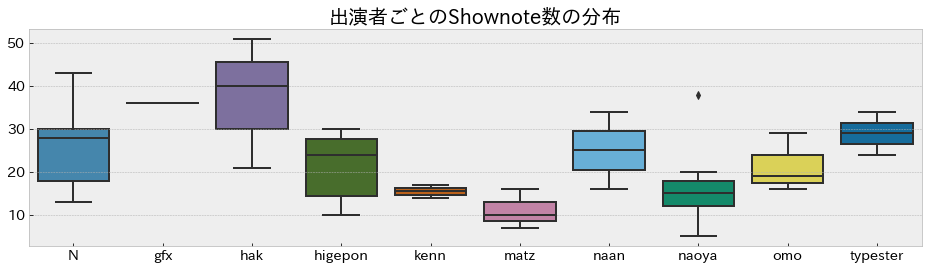

In [53]:
ax = sns.boxplot(data=dfms.query('n_shownotes > 0').query('person in @top10_speaker').sort_values('person'), x='person', y='n_shownotes')
ax.set_title('出演者ごとのShownote数の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

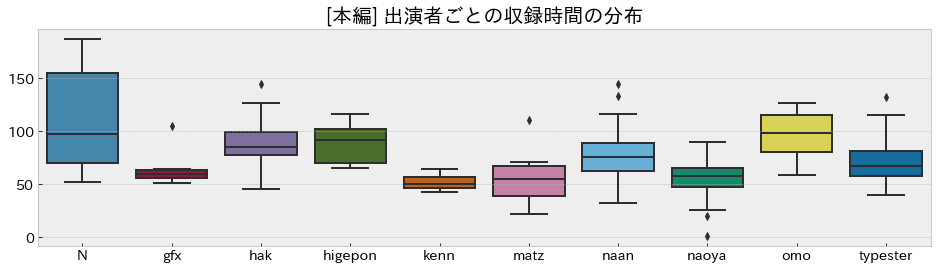

In [54]:
ax = sns.boxplot(data=dfs.query('~is_aftershow').query('person in @top10_speaker').sort_values('person'), x='person', y='minutes')
ax.set_title('[本編] 出演者ごとの収録時間の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

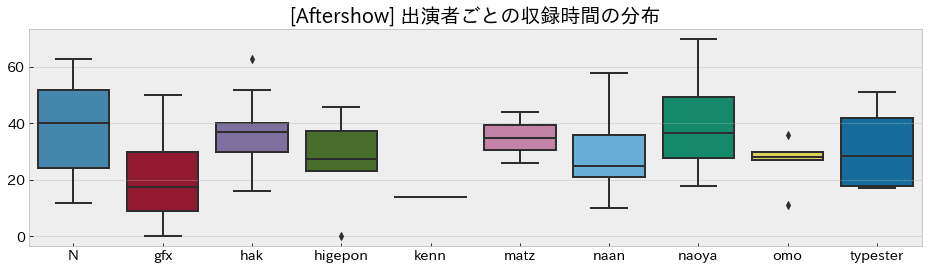

In [55]:
ax = sns.boxplot(data=dfs.query('is_aftershow').query('person in @top10_speaker').sort_values('person'), x='person', y='minutes')
ax.set_title('[Aftershow] 出演者ごとの収録時間の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

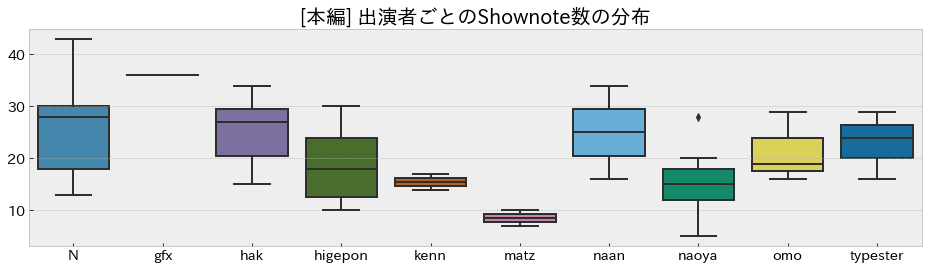

In [56]:
ax = sns.boxplot(data=dfs.query('~is_aftershow').query('n_shownotes > 0').query('person in @top10_speaker').sort_values('person'), x='person', y='n_shownotes')
ax.set_title('[本編] 出演者ごとのShownote数の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

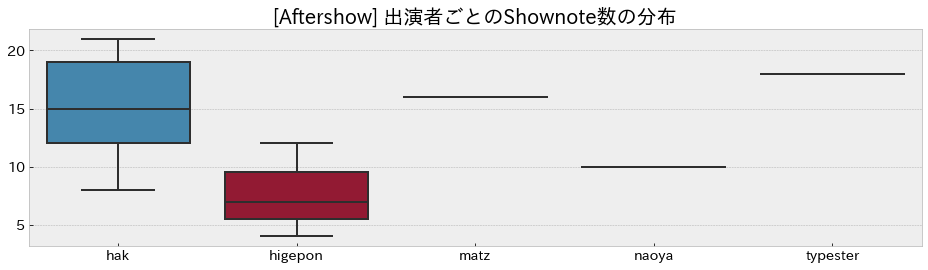

In [57]:
ax = sns.boxplot(data=dfs.query('is_aftershow').query('person in @top10_speaker').query('n_shownotes > 0').sort_values('person'), x='person', y='n_shownotes')
ax.set_title('[Aftershow] 出演者ごとのShownote数の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

In [71]:
dfm.columns

Index(['date_main', 'persons_main', 'record_time_main', 'shownotes_main',
       'title_main', 'n_shownotes_main', 'minutes_main', 'is_aftershow_main',
       'show_no', 'date_after', 'persons_after', 'record_time_after',
       'shownotes_after', 'title_after', 'n_shownotes_after', 'minutes_after',
       'is_aftershow_after', 'date', 'minutes', 'persons', 'n_shownotes'],
      dtype='object')

In [75]:
dfm.sort_values('minutes', ascending=False)[['minutes', 'title_main', 'title_after', 'minutes_main', 'minutes_after']].reset_index(drop=True)

,minutes,title_main,title_after,minutes_main,minutes_after
0,187.0,213: Open-Plan Jail (N),NaN,187,NaN
1,181.0,198: Gaming Hogehoge (drikin),NaN,181,NaN
2,181.0,210: The VR Era (hak),Aftershow 210: Don't Install This Game (hak),144,37.0
3,175.0,"173: There Are No Gems, Only Stones (N)",NaN,175,NaN
4,169.0,178: Professionals of Cargo Culting (N),NaN,169,NaN
5,169.0,191: Two More Bowls of Rice (hak),Aftershow 191: Alternative Momoi (hak),127,42.0
6,169.0,192: The Future Is Now (N),NaN,169,NaN
7,165.0,195: Notch By Perfume (N),NaN,165,NaN
8,160.0,"182: Garbage In, Poo Out (N)",NaN,160,NaN
9,160.0,171: Psychologically Safe Podcast (naoya),Aftershow 171: Muscle Memory (naoya),90,70.0


# shownoteと収録時間の関係

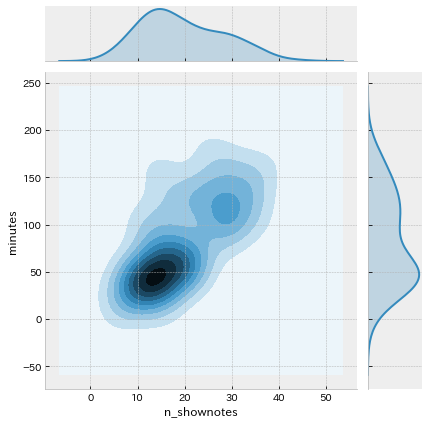

In [59]:
sns.jointplot("n_shownotes", "minutes", data=df.query('n_shownotes > 0'), kind="kde")